In [1]:
import matplotlib.pyplot as plt

In [ ]:
import h5py
import numpy as np

filename = "/allen/aind/scratch/tim.kim/track-mjx/data/transform_snips.h5"

f = h5py.File(filename, "r")

In [3]:
for key in f.keys():
    print(key)

config
kp_data
kp_names
marker_sites
names_qpos
names_xpos
offsets
qpos
qvel
snips_order
xpos
xquat


In [4]:
f['config'][()]

np.bytes_(b'model:\n  MJCF_PATH: models/rodent.xml\n  FTOL: 0.005\n  ROOT_FTOL: 1.0e-05\n  LIMB_FTOL: 1.0e-06\n  N_ITERS: 6\n  KP_NAMES:\n  - Snout\n  - EarL\n  - EarR\n  - SpineF\n  - SpineM\n  - SpineL\n  - TailBase\n  - ShoulderL\n  - ElbowL\n  - WristL\n  - HandL\n  - ShoulderR\n  - ElbowR\n  - WristR\n  - HandR\n  - HipL\n  - KneeL\n  - AnkleL\n  - FootL\n  - HipR\n  - KneeR\n  - AnkleR\n  - FootR\n  KEYPOINT_MODEL_PAIRS:\n    AnkleL: lower_leg_L\n    AnkleR: lower_leg_R\n    EarL: skull\n    EarR: skull\n    ElbowL: upper_arm_L\n    ElbowR: upper_arm_R\n    FootL: foot_L\n    FootR: foot_R\n    HandL: hand_L\n    HandR: hand_R\n    HipL: pelvis\n    HipR: pelvis\n    KneeL: upper_leg_L\n    KneeR: upper_leg_R\n    ShoulderL: scapula_L\n    ShoulderR: scapula_R\n    Snout: skull\n    SpineF: vertebra_cervical_5\n    SpineL: pelvis\n    SpineM: vertebra_1\n    TailBase: pelvis\n    WristL: lower_arm_L\n    WristR: lower_arm_R\n  KEYPOINT_INITIAL_OFFSETS:\n    AnkleL: -0.03230154033

In [5]:
f['kp_data'][()].shape

(210500, 69)

In [6]:
f['kp_names'][()].shape

(23,)

In [7]:
f['marker_sites'][()].shape

(210500, 23, 3)

In [8]:
f['names_qpos'][()].shape

(74,)

In [9]:
f['names_xpos'][()].shape

(67,)

In [10]:
f['offsets'][()].shape

(23, 3)

In [11]:
f['qpos'][()].shape

(210500, 74)

In [12]:
f['qvel'][()].shape

(210500, 73)

In [13]:
f['snips_order'][()].shape

(842,)

In [14]:
f['xpos'][()].shape

(210500, 67, 3)

In [15]:
f['xquat'][()].shape

(210500, 67, 4)

In [16]:
qpos_pos = f['qpos'][()][:, :3]
qpos_pos = np.reshape(qpos_pos, (-1, 250, 3))

NameError: name 'np' is not defined

In [ ]:
qpos_pos.shape

(842, 250, 3)

In [ ]:
xpos = f['xpos'][()]
import numpy as np
xpos = np.reshape(xpos, (-1, 250, 67 ,3))

In [ ]:
joint = 1
f['names_xpos'][()][joint]

np.bytes_(b'walker')

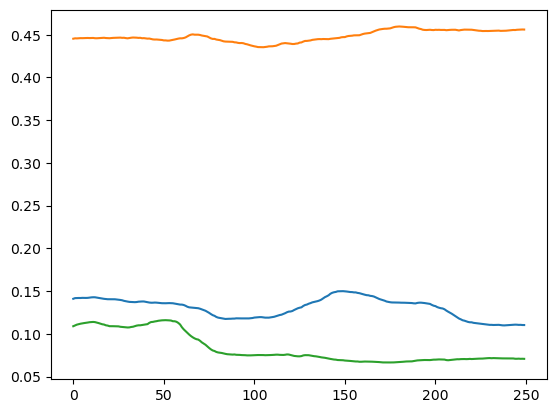

In [ ]:
clip = 3
plt.plot(xpos[clip, :, joint, 0])
plt.plot(xpos[clip, :, joint, 1])
plt.plot(xpos[clip, :, joint, 2])

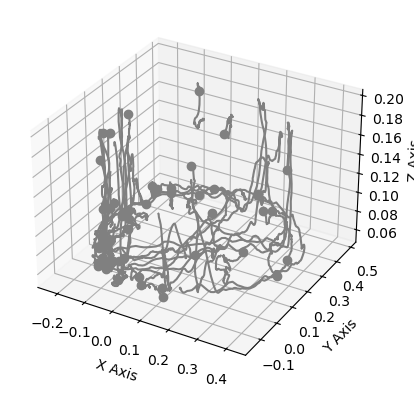

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
joint = 50
for clip in range(50): #range(xpos.shape[0]):
    ax.plot(
        xpos[clip, :, joint, 0],
        xpos[clip, :, joint, 1], 
        xpos[clip, :, joint, 2],
        '-',
        color='gray'
    )
    ax.plot(
        xpos[clip, -1, joint, 0],
        xpos[clip, -1, joint, 1], 
        xpos[clip, -1, joint, 2],
        'o',
        color='gray'
    )

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Display the plot
plt.show()

In [ ]:
joint = 1 # walker
np.all(qpos_pos == xpos[:, :, joint, :])

np.True_

In [17]:
np.sum([np.all(qpos_pos == xpos[:, :, joint, :]) for joint in range(67)])

NameError: name 'np' is not defined

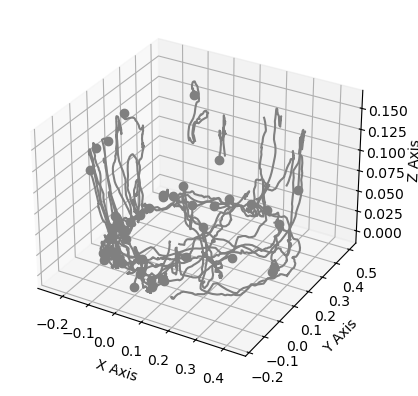

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
for clip in range(50): #range(xpos.shape[0]):
    ax.plot(
        qpos_pos[clip, :, 0],
        qpos_pos[clip, :, 1], 
        qpos_pos[clip, :, 2],
        '-',
        color='gray'
    )
    ax.plot(
        qpos_pos[clip, -1, 0],
        qpos_pos[clip, -1, 1], 
        qpos_pos[clip, -1, 2],
        'o',
        color='gray'
    )

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Display the plot
plt.show()

In [22]:
filename = "/allen/aind/scratch/tim.kim/track-mjx/data/art/2020_12_22_1.h5"

g = h5py.File(filename, "r")

In [23]:
g['ephys']['spike_counts'][()].shape

(360000, 131)

In [25]:
np.unique(g['behavior']['motion_mapper'][()]).shape

(94,)

In [26]:
g['behavior']['motion_mapper'][()]

array([74, 74, 61, ..., 34, 34, 34], dtype=uint8)

In [78]:
g['pose']['keypoints'][()].shape

(360000, 3, 23)

In [77]:
g['pose']['qpos'][()].shape

(360000, 74)

In [80]:
from sklearn.decomposition import PCA

In [103]:
pca = PCA(n_components=74)

In [94]:
qpos = g['pose']['qpos'][()]

In [95]:
pca.fit(qpos)

PCA(n_components=74)

Text(0, 0.5, 'explained variance')

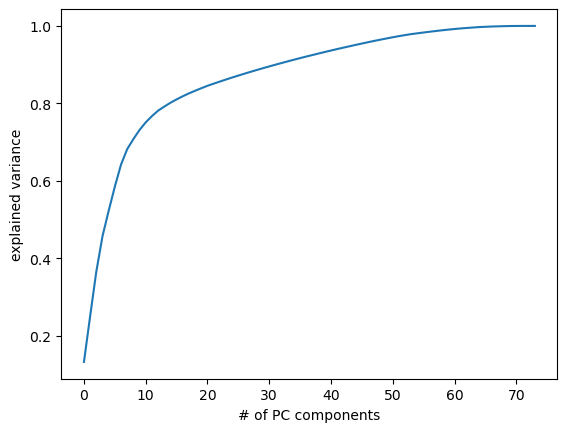

In [96]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PC components")
plt.ylabel("explained variance")

In [89]:
np.cumsum(pca.explained_variance_ratio_)[:30]

array([0.13209182, 0.24997381, 0.36519008, 0.45656147, 0.52228584,
       0.58483812, 0.64174087, 0.68174555, 0.70764832, 0.73122421,
       0.75084582, 0.76693312, 0.78102985, 0.79158441, 0.80153796,
       0.81023188, 0.81835432, 0.8257931 , 0.83250487, 0.83905312,
       0.84536746, 0.85083851, 0.85624679, 0.8615437 , 0.86676476,
       0.87177518, 0.87670023, 0.88153809, 0.88626264, 0.89084383])

In [100]:
spikes = g['ephys']['spike_counts'][()]

In [104]:
pca.fit(spikes)

PCA(n_components=74)

In [93]:
spikes[:100, 0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Text(0, 0.5, 'explained variance')

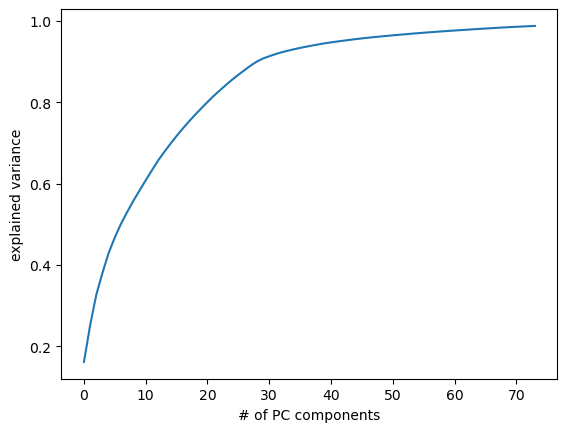

In [105]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PC components")
plt.ylabel("explained variance")